# Generowanie procesów punktowych

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Proces regularny z komponentem losowym w obrębie prostokątnego obszaru

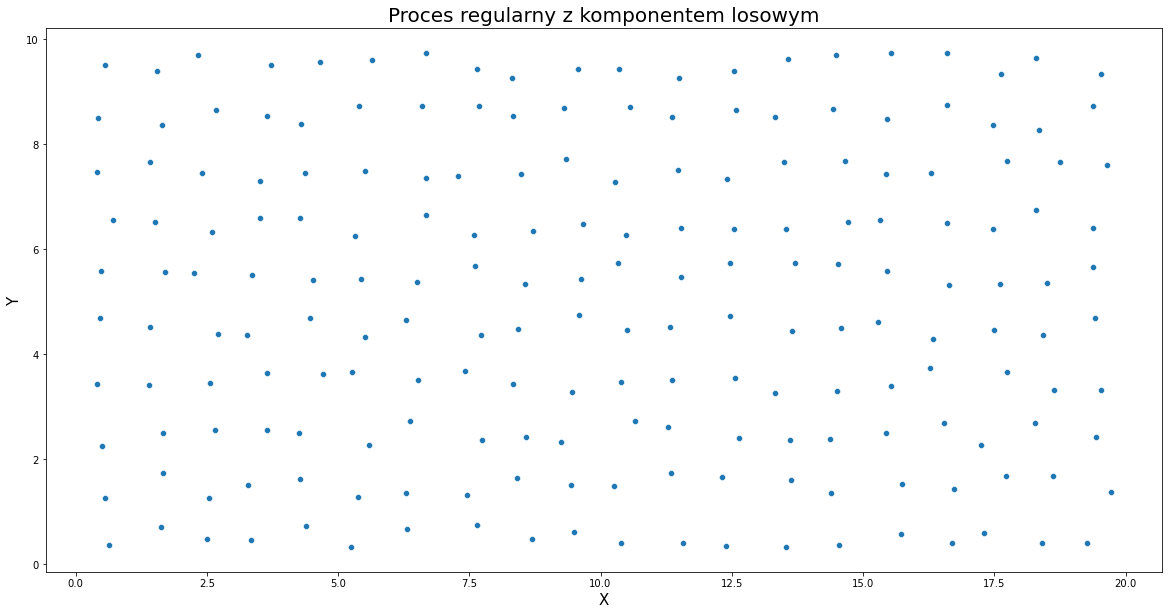

In [2]:
def regular_on_rectangle(grid, random_component, x_lim, y_lim):
    """
    Parameters
    -------
    grid: list
        Lista określająca liczbę punktów w pionie i poziomie.
        Przykład: [10, 10]
    random_component: float
        Liczba z przedziału [0, 1] określająca wielkość komponentu losowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    dx=abs(x_lim[1]-x_lim[0])/grid[0]
    dy=abs(y_lim[1]-y_lim[0])/grid[1]
    mx=np.linspace(x_lim[0]+dx/2, x_lim[1]-dx/2, grid[0])
    my=np.linspace(y_lim[0]+dy/2, y_lim[1]-dy/2, grid[1])
    px,py=np.meshgrid(mx,my)
    rx=np.random.rand(np.size(px)//np.size(px[0]),np.size(px[0]))*(-dx)+dx/2
    ry=np.random.rand(np.size(py)//np.size(py[0]),np.size(py[0]))*(-dy)+dy/2
    px=px+random_component*rx
    py=py+random_component*ry
    p={'X':px.flatten(), 'Y':py.flatten()}
    points=pd.DataFrame(p)
    return points

points=regular_on_rectangle([20,10],0.5,[0,20],[0,10])

fig, ax1=plt.subplots(figsize=(20,20))
sns.scatterplot(data=points,x="X",y="Y", ax=ax1)
ax1.set_title("Proces regularny z komponentem losowym", fontsize=20)
plt.xlabel("X", fontsize=15)
plt.ylabel("Y", fontsize=15)
ax1.set_aspect('equal', 'box')

Jednorodny proces punktowy Poissona w obrębie prostokątnego obszaru

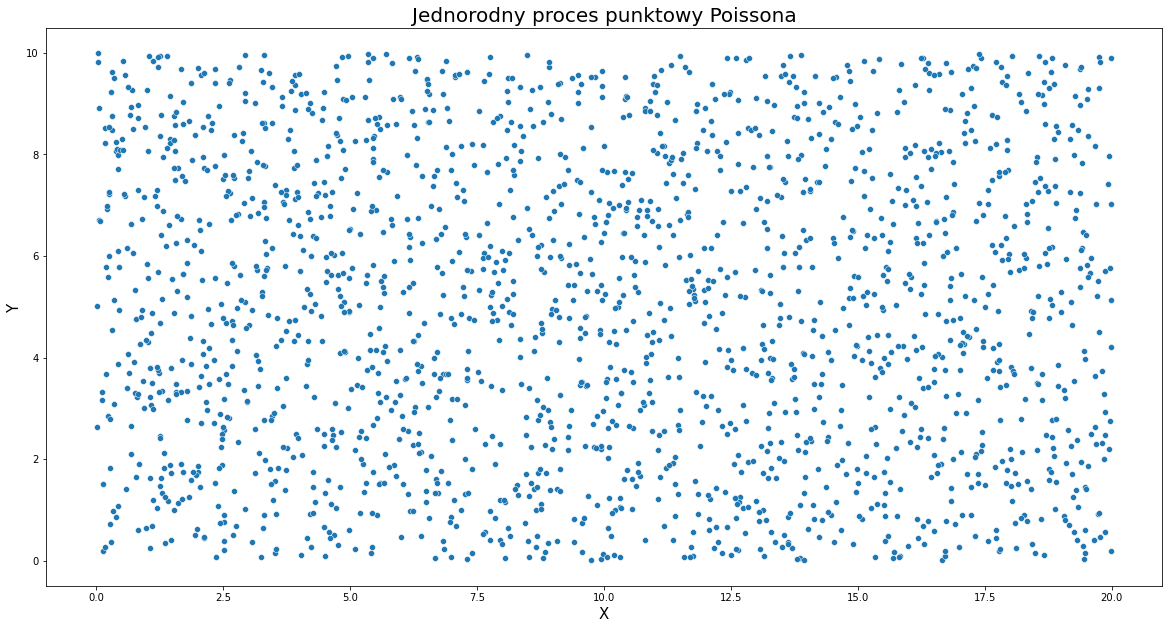

In [3]:
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    a = (abs(x_lim[1]-x_lim[0]))*(abs(y_lim[1]-y_lim[0]))
    ex = intensity*a
    n = np.random.poisson(lam=ex, size=1)
    nn=n[0]
    x=np.random.rand(nn)*(x_lim[1]-x_lim[0])+x_lim[0]
    y=np.random.rand(nn)*(y_lim[1]-y_lim[0])+y_lim[0]
    p={"X":x.flatten(),"Y":y.flatten()}
    points=pd.DataFrame(p)
    return points

points=homogeneous_poisson_on_rectangle(10,[0,20],[0,10])

fig, ax1=plt.subplots(figsize=(20,20))
sns.scatterplot(data=points,x="X",y="Y")
ax1.set_title("Jednorodny proces punktowy Poissona", fontsize=20)
plt.xlabel("X", fontsize=15)
plt.ylabel("Y", fontsize=15)
ax1.set_aspect('equal', 'box')

Niejednorodny proces punktowy Poissona w obrębie prostokątnego obszaru

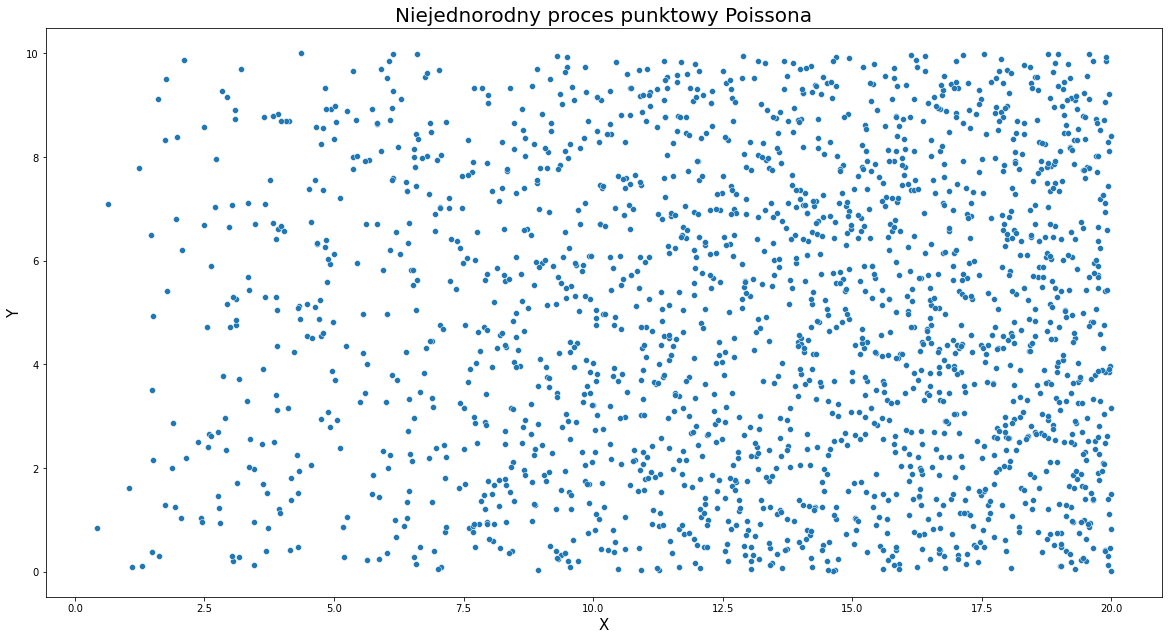

In [4]:
def unhomogeneous_poisson_on_rectangle(intensity_function, x_lim, y_lim):
    """
    Parameters
    -------
    intensity_function: function
        Funkcja przyjmująca dwa argumenty (macierz 1D współrzędnych X i macierz 1D współrzędnych Y) i zwracająca macierz 1D
        z wartościami funkcji opisującej intensywność procesu dla tych współrzędnych.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10] 
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    srx=(x_lim[0]+x_lim[1])/2
    sry=(y_lim[0]+y_lim[1])/2
    max_fun=sp.optimize.minimize(lambda x: -intensity_function(x), (srx, sry), bounds=((x_lim[0], x_lim[1]),(y_lim[0], y_lim[1])))
    points=homogeneous_poisson_on_rectangle(-max_fun.fun,x_lim,y_lim)
    points_praw=1-intensity_function([points["X"],points["Y"]])/-max_fun.fun
    a=np.zeros(points["X"].size)
    for i in range(points["X"].size):
        a[i]=np.random.choice([1,0],p=[points_praw[i],1-points_praw[i]])
    points2_a=np.where(a==0)
    points=points.loc[points2_a]
    return points

points=unhomogeneous_poisson_on_rectangle(lambda x:x[0], [0,20], [0,10])

fig, ax1=plt.subplots(figsize=(20,20))
sns.scatterplot(data=points,x="X",y="Y")
ax1.set_title("Niejednorodny proces punktowy Poissona", fontsize=20)
plt.xlabel("X", fontsize=15)
plt.ylabel("Y", fontsize=15)
ax1.set_aspect('equal', 'box')

Proces punktowy Matérna w obrębie prostokątnego obszaru

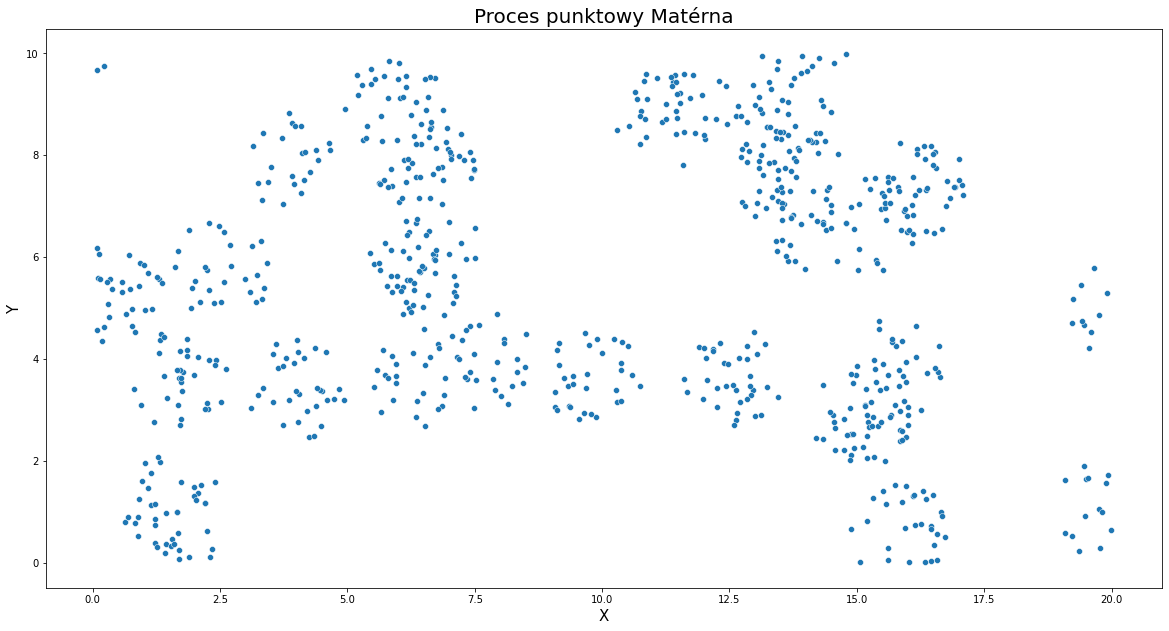

In [5]:
def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    daughter_intensity: float
        Liczba dodatnia określająca intensywność potomnego procesu punktowego.
    cluster_radius: float
        Liczba dodatnia określająca promień generowanych klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    x_lim_r=[x_lim[0]-cluster_radius,x_lim[1]+cluster_radius]
    y_lim_r=[y_lim[0]-cluster_radius,y_lim[1]+cluster_radius]
    points=homogeneous_poisson_on_rectangle(parent_intensity,x_lim_r,y_lim_r)
    points2=pd.DataFrame()
    for i in range(points['X'].size):
        x=homogeneous_poisson_on_rectangle(daughter_intensity,[points['X'][i]-cluster_radius,points['X'][i]+cluster_radius],[points['Y'][i]-cluster_radius,points['Y'][i]+cluster_radius])
        x_pom=np.where((x['X']-points['X'][i])**2+(x['Y']-points['Y'][i])**2<=cluster_radius**2)
        x=x.loc[x_pom]
        points2=pd.concat([x, points2],ignore_index=True)
    
    points2_a=np.where((points2['X']<x_lim[1]) & (points2['X']>x_lim[0]) &  (points2['Y']<y_lim[1]) & (points2['Y']>y_lim[0]))
    points2=points2.loc[points2_a]
    return points2

points=materna_on_rectangle(0.2, 10, 1, [0,20], [0,10])

fig, ax1=plt.subplots(figsize=(20,20))
sns.scatterplot(data=points,x="X",y="Y")
ax1.set_title("Proces punktowy Matérna", fontsize=20)
plt.xlabel("X", fontsize=15)
plt.ylabel("Y", fontsize=15)
ax1.set_aspect('equal', 'box')

Proces punktowy Thomasa w obrębie prostokątnego obszaru

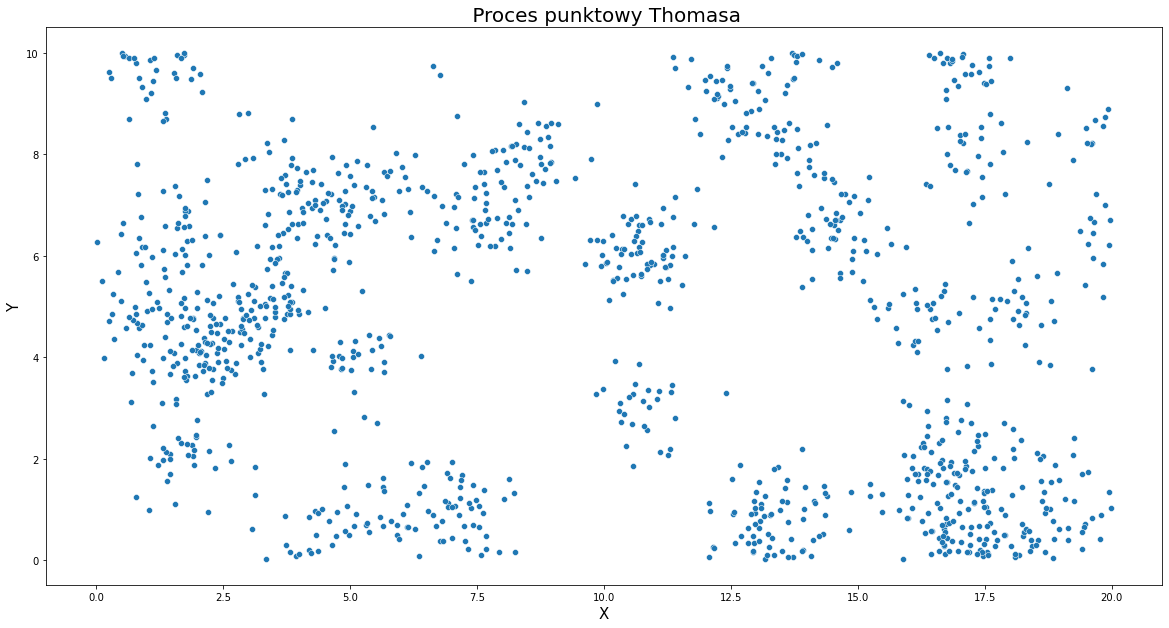

In [6]:
def thomas_on_rectangle(parent_intensity, mean_cluster_size, cluster_sigma, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    mean_cluster_size: float
        Liczba dodatnia określająca oczekiwaną liczebność generowanych klastrów.
    cluster_sigma: float
        Liczba dodatnia określająca odchylenie standardowe rozkładu wykorzystywanego w procesie generowania klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    x_lim_r=[x_lim[0]-4*cluster_sigma,x_lim[1]+4*cluster_sigma]
    y_lim_r=[y_lim[0]-4*cluster_sigma,y_lim[1]+4*cluster_sigma]
    points=homogeneous_poisson_on_rectangle(parent_intensity,x_lim_r,y_lim_r)
    n = np.random.poisson(lam=mean_cluster_size, size=points['X'].size)
    points2=pd.DataFrame()
    for i in range(points['X'].size):
        x=np.random.randn(n[i])*(-cluster_sigma)+points['X'][i]
        y=np.random.randn(n[i])*(-cluster_sigma)+points['Y'][i]
        p={"X":x.flatten(),"Y":y.flatten()}
        points2_pom=pd.DataFrame(p)
        points2=pd.concat([points2_pom, points2],ignore_index=True)
    
    points2_a=np.where((points2['X']<x_lim[1]) & (points2['X']>x_lim[0]) &  (points2['Y']<y_lim[1]) & (points2['Y']>y_lim[0]))
    points2=points2.loc[points2_a]
    return points2

points=thomas_on_rectangle(0.2,30,0.5,[0,20],[0,10])

fig, ax1=plt.subplots(figsize=(20,20))
sns.scatterplot(data=points,x="X",y="Y")
ax1.set_title(" Proces punktowy Thomasa", fontsize=20)
plt.xlabel("X", fontsize=15)
plt.ylabel("Y", fontsize=15)
ax1.set_aspect('equal', 'box')